In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity

 96% 195M/204M [00:02<00:00, 83.4MB/s]
100% 204M/204M [00:02<00:00, 81.5MB/s]


In [ ]:
data_path = '/content/knee-osteoarthritis-dataset-with-severity.zip'
import zipfile
zip_ref = zipfile.ZipFile(data_path)
zip_ref.extractall()
zip_ref.close()

In [ ]:
# count images in train dir
import os
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/val'

# train
print('train :\n')
for dirpath, dirname, filename in os.walk(train_path):
  print(f'There are {len(dirname)} dirctory and {len(filename)} images in "{dirpath}" . ')
print('\ntest :\n')

# test
for dirpath, dirname, filename in os.walk(test_path):
  print(f'There are {len(dirname)} dirctory and {len(filename)} images in "{dirpath}" . ')
print('\nval :\n')

# val
for dirpath, dirname, filename in os.walk(val_path):
  print(f'There are {len(dirname)} dirctory and {len(filename)} images in "{dirpath}" . ')

train :

There are 5 dirctory and 0 images in "/content/train" . 
There are 0 dirctory and 1516 images in "/content/train/2" . 
There are 0 dirctory and 2286 images in "/content/train/0" . 
There are 0 dirctory and 757 images in "/content/train/3" . 
There are 0 dirctory and 1046 images in "/content/train/1" . 
There are 0 dirctory and 173 images in "/content/train/4" . 

test :

There are 5 dirctory and 0 images in "/content/test" . 
There are 0 dirctory and 447 images in "/content/test/2" . 
There are 0 dirctory and 639 images in "/content/test/0" . 
There are 0 dirctory and 223 images in "/content/test/3" . 
There are 0 dirctory and 296 images in "/content/test/1" . 
There are 0 dirctory and 51 images in "/content/test/4" . 

val :

There are 5 dirctory and 0 images in "/content/val" . 
There are 0 dirctory and 212 images in "/content/val/2" . 
There are 0 dirctory and 328 images in "/content/val/0" . 
There are 0 dirctory and 106 images in "/content/val/3" . 
There are 0 dirctory a

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [ ]:
list_of_classes=['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

classlist=os.listdir(train_path)

for klass in classlist:
    intklass=int(klass)
    label=list_of_classes[intklass]
    print(label)
    classpath=os.path.join(train_path, klass)
    print(classpath)
    flist=os.listdir(classpath)
    print(len(flist))

In [ ]:
train_path = train_path
test_path = test_path
valid_path = val_path

list_of_classes=['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']


for d in [train_path, test_path, valid_path]:
    filepaths = []
    labels=[]
    classlist=os.listdir(d)

    for klass in classlist:
        intklass=int(klass)
        label=list_of_classes[intklass]
        classpath=os.path.join(d, klass)
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(label)
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    pdf=pd.concat([Fseries, Lseries], axis=1)
    if d == test_path:
        test_df=pdf
    elif d == valid_path:
        valid_df=pdf
    else:
        train_df=pdf
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
ht=0
wt=0

train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

train_df lenght:  5778   test_df length:  1656   valid_df length:  826
The number of classes in the dataset is:  5
            CLASS               IMAGE COUNT 
           Doubtful                1046     
           Healthy                 2286     
           Minimal                 1516     
           Moderate                 757     
            Severe                  173     
Healthy  has the most images=  2286   Severe  has the least images=  173
average height=  224  average width=  224 aspect ratio=  1.0


In [ ]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    groups=df.groupby(column)
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique():
        group=groups.get_group(label)
        count=len(group)
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    return trimmed_df

max_samples=500 # since each class has more than 200 images all classes will be trimmed to have 200 images per class
min_samples=173
column='labels'
train_df= trim(train_df, max_samples, min_samples, column)

after trimming, the maximum samples in any class is now  500  and the minimum samples in any class is  173


In [ ]:
for dirpath, dirname, filename in os.walk('/content/aug/Severe'):
  print(f'there are {len(dirname)} directory and {len(filename)} images in {dirpath}')

In [ ]:
import shutil
def balance(df, n, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in df['labels'].unique():
        dir_path=os.path.join(aug_dir,label)
        os.mkdir(dir_path)

    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2, height_shift_range=.2, zoom_range=.2)
    groups=df.groupby('labels')
    for label in df['labels'].unique():
        group=groups.get_group(label)
        sample_count=len(group)
        if sample_count< n:
            aug_img_count=0
            delta=n - sample_count
            target_dir=os.path.join(aug_dir, label)
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='')
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size, class_mode=None, batch_size=1,
                                            shuffle=False, save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb', save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)

    aug_fpaths=[]
    aug_labels=[]
    classlist=os.listdir(aug_dir)
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')
    aug_df=pd.concat([Fseries, Lseries], axis=1)
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df

n=600
working_dir=r'./'
img_size=(224,224)
train_df=balance(train_df, n, working_dir, img_size)

Initial length of dataframe is  2173
Found 500 validated image filenames.
Found 500 validated image filenames.
Found 500 validated image filenames.
Found 500 validated image filenames.
Found 173 validated image filenames.
Total Augmented images created=  827
Length of augmented dataframe is now  3000


In [ ]:
batch_size=20
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20 )
t_and_v_gen=ImageDataGenerator()
msg='{0:70s} for train generator'.format(' ')
print(msg, '\r', end='')
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='{0:70s} for valid generator'.format(' ')
print(msg, '\r', end='')
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
msg='{0:70s} for test generator'.format(' ')
print(msg, '\r', end='')
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)

classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

Found 3000 validated image filenames belonging to 5 classes.
Found 826 validated image filenames belonging to 5 classes.
Found 1656 validated image filenames belonging to 5 classes.
test batch size:  72   test steps:  23  number of classes :  5


In [ ]:
for i in range(0,5):
  target = classes[i]
  print(target ,train_gen.labels.count(i))

Doubtful 600
Healthy 600
Minimal 600
Moderate 600
Severe 600


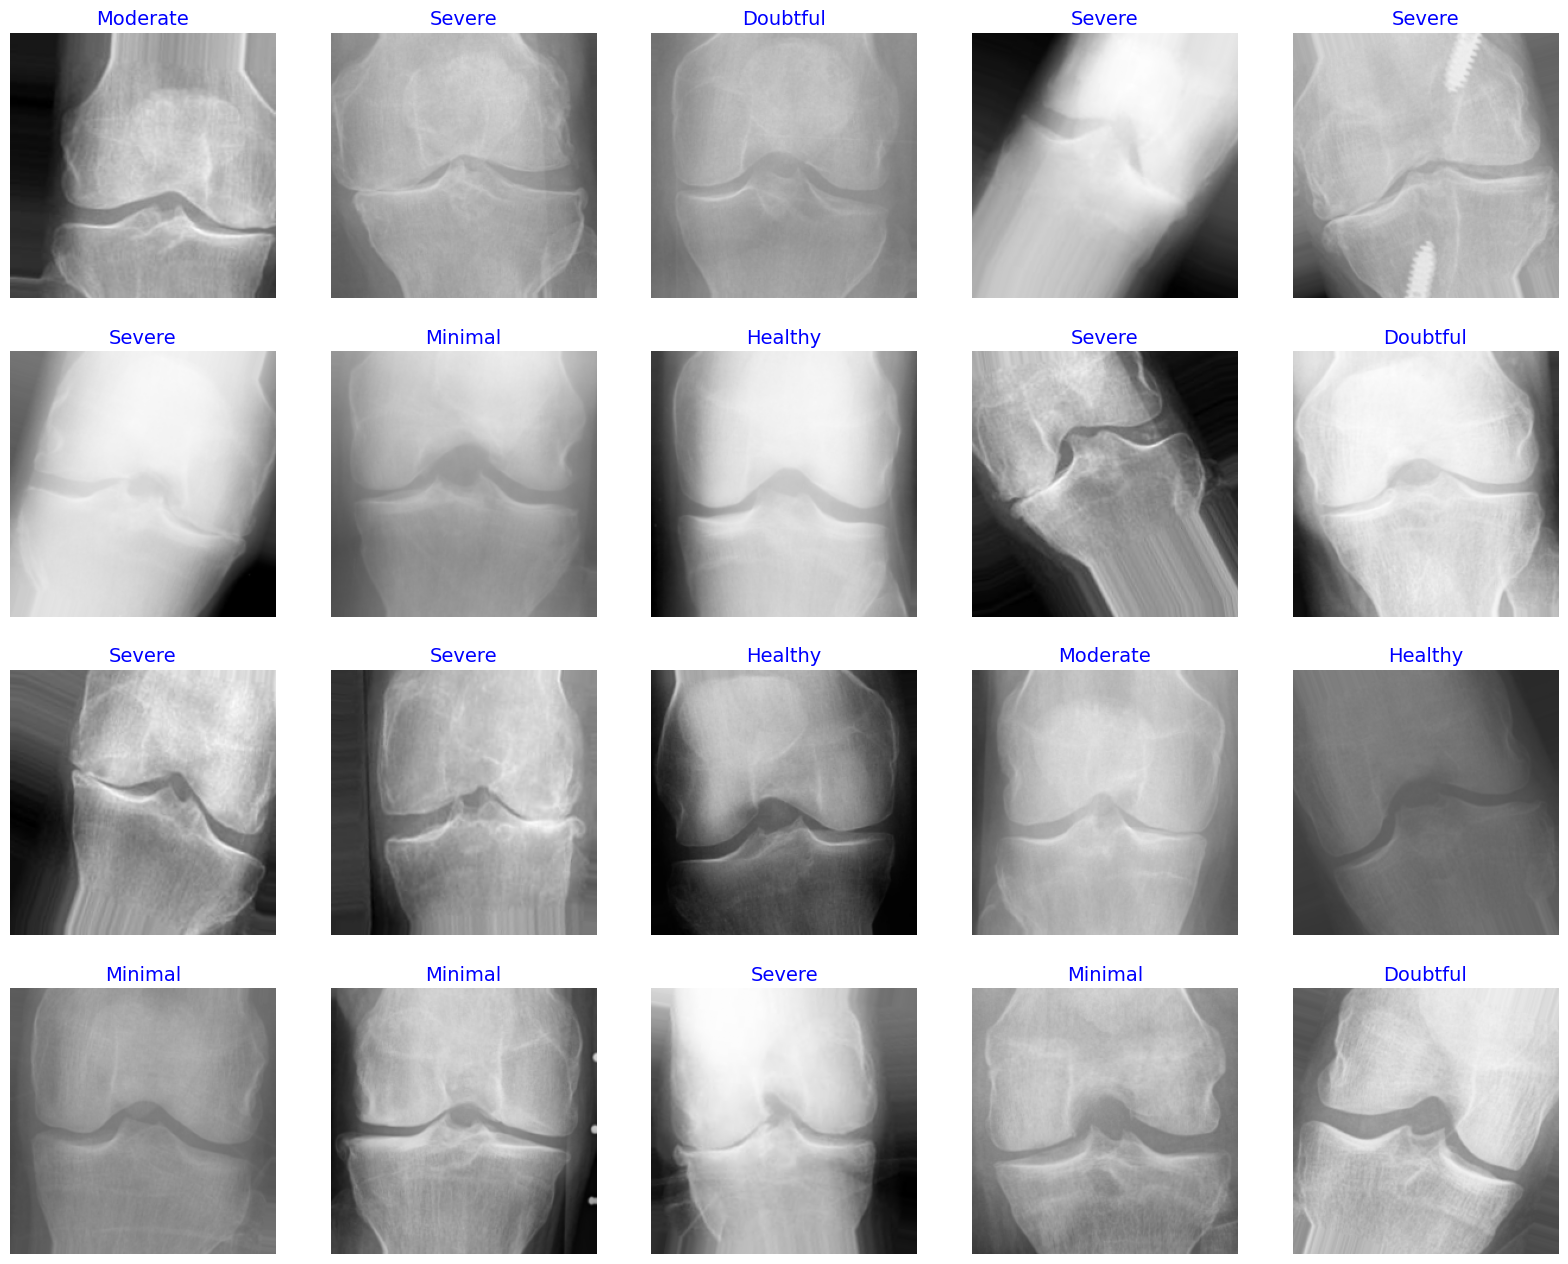

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    for i in range(length):
        plt.subplot(5, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=14)
        plt.axis('off')
    plt.show()

show_image_samples(train_gen )

## Create a model using transfer learning with EfficientNetB5


In [ ]:
img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetV2M'
base_model=tf.keras.applications.EfficientNetV2M(include_top=False, weights="imagenet",
                                                 input_shape=img_shape, pooling='max')

base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

214201816/214201816 [==============================] - 2s 0us/step


In [ ]:
import time
class LR_ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch):
        super(LR_ASK, self).__init__()
        self.model=model
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True
        self.lowest_vloss=np.inf
        self.best_weights=self.model.get_weights()
        self.best_epoch=1


    def on_train_begin(self, logs=None):
        if self.ask_epoch == 0:
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs:
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to')
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')
        self.start_time= time.time() # set the time at which training started

    def on_train_end(self, logs=None):   # runs at the end of training
        print('loading model with weights from epoch ', self.best_epoch)
        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        if v_loss< self.lowest_vloss:
            self.lowest_vloss=v_loss
            self.best_weights=self.model.get_weights() # set best weights to model's initial weights
            self.best_epoch=epoch + 1
            print (f'\n validation loss of {v_loss:7.4f} is below lowest loss, saving weights from epoch {str(epoch + 1):3s} as best weights')
        else:
            print (f'\n validation loss of {v_loss:7.4f} is above lowest loss of {self.lowest_vloss:7.4f} keeping weights from epoch {str(self.best_epoch)} as best weights')

        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()

                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)
                        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                        print(f'current LR is  {lr:7.5f}  hit enter to keep  this LR or enter a new LR')
                        ans=input(' ')
                        if ans =='':
                            print (f'keeping current LR of {lr:7.5f}')
                        else:
                            new_lr=float(ans)
                            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                            print(' changing LR to ', ans)

In [ ]:
epochs=40
ask_epoch=10
ask=LR_ASK(model, epochs,  ask_epoch)
#rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
#callbacks=[rlronp, ask]
callbacks=[ask]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
150/150 [==============================] - ETA: 0s - loss: 8.3113 - accuracy: 0.3677
 validation loss of  7.5709 is below lowest loss, saving weights from epoch 1   as best weights
150/150 [==============================] - 209s 643ms/step - loss: 8.3113 - accuracy: 0.3677 - val_loss: 7.5709 - val_accuracy: 0.5073
Epoch 2/40
150/150 [==============================] - ETA: 0s - loss: 6.2366 - accuracy: 0.5537
 validation loss of  5.8812 is below lowest loss, saving weights from epoch 2   as best weights
150/150 [==============================] - 94s 626ms/step - loss: 6.2366 - accuracy: 0.5537 - val_loss: 5.8812 - val_accuracy: 0.3923
Epoch 3/40
150/150 [==============================] - ETA: 0s - loss: 5.2286 - accuracy: 0.5963
 validation loss of  4.7723 is below lowest loss, saving weights from epoch 3   as best w

KeyboardInterrupt: Interrupted by user

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
150/150 [==============================] - ETA: 0s - loss: 1.4345 - accuracy: 0.7523
 validation loss of  1.6849 is below lowest loss, saving weights from epoch 1   as best weights
150/150 [==============================] - 99s 661ms/step - loss: 1.4345 - accuracy: 0.7523 - val_loss: 1.6849 - val_accuracy: 0.5472
Epoch 2/40
150/150 [==============================] - ETA: 0s - loss: 1.2935 - accuracy: 0.7373
 validation loss of  1.4462 is below lowest loss, saving weights from epoch 2   as best weights
150/150 [==============================] - 90s 601ms/step - loss: 1.2935 - accuracy: 0.7373 - val_loss: 1.4462 - val_accuracy: 0.6126
Epoch 3/40
150/150 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.7710
 validation loss of  1.4182 is below lowest loss, saving weights from epoch 3   as best we

In [ ]:
model.save("EfficientNetV2M.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp -r '/content/EfficientNetV2M.h5' "/content/gdrive/MyDrive/trained model"

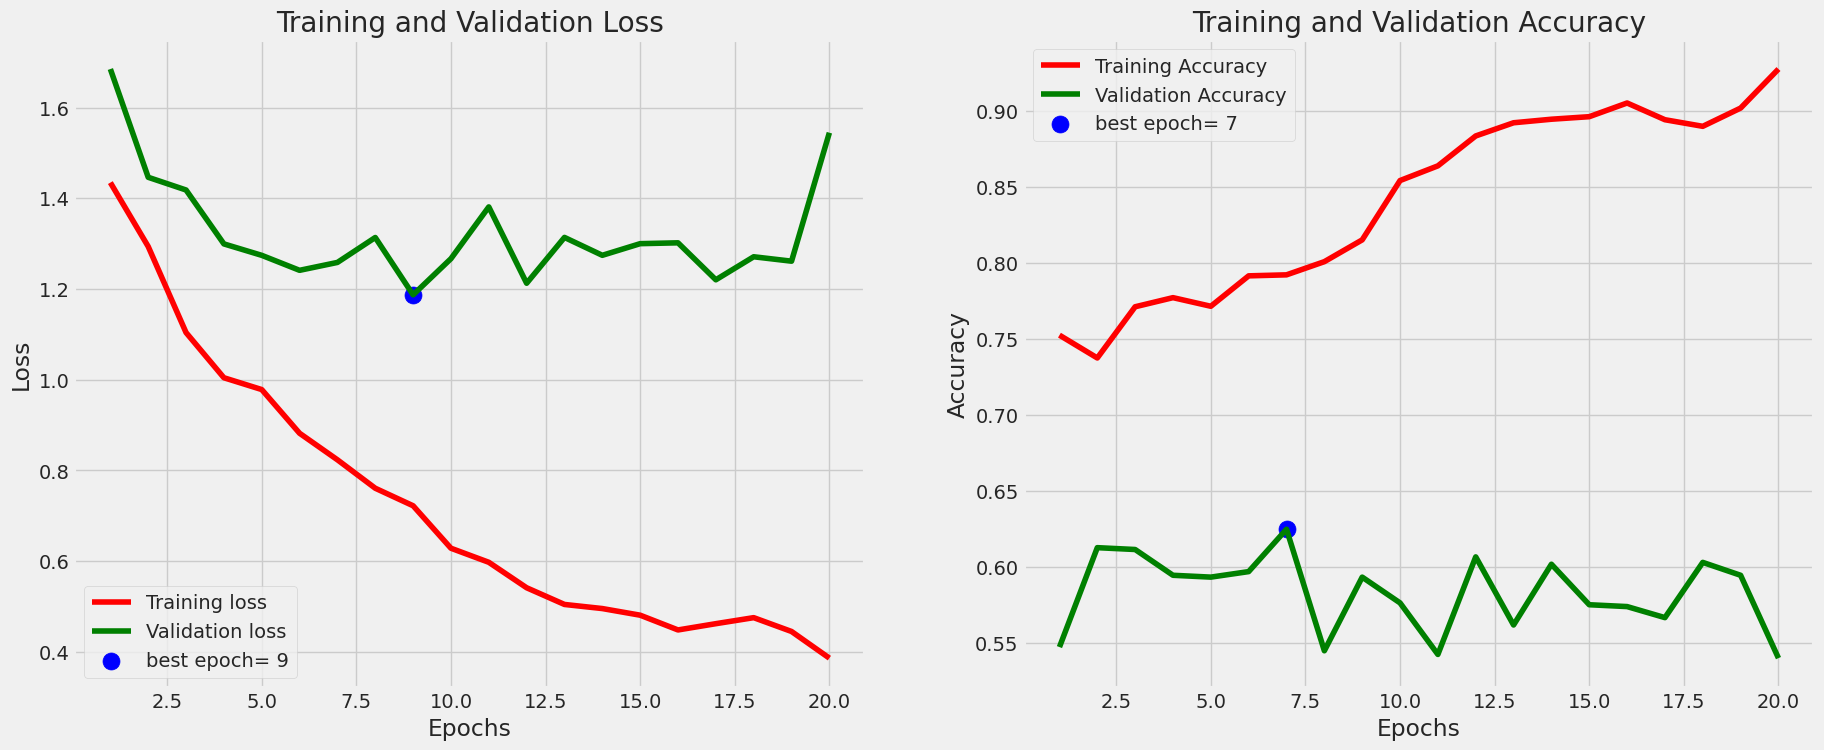

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

tr_plot(history,0)


23/23 [==============================] - 19s 423ms/step
there were 578 errors in 1656 tests for an accuracy of  65.10


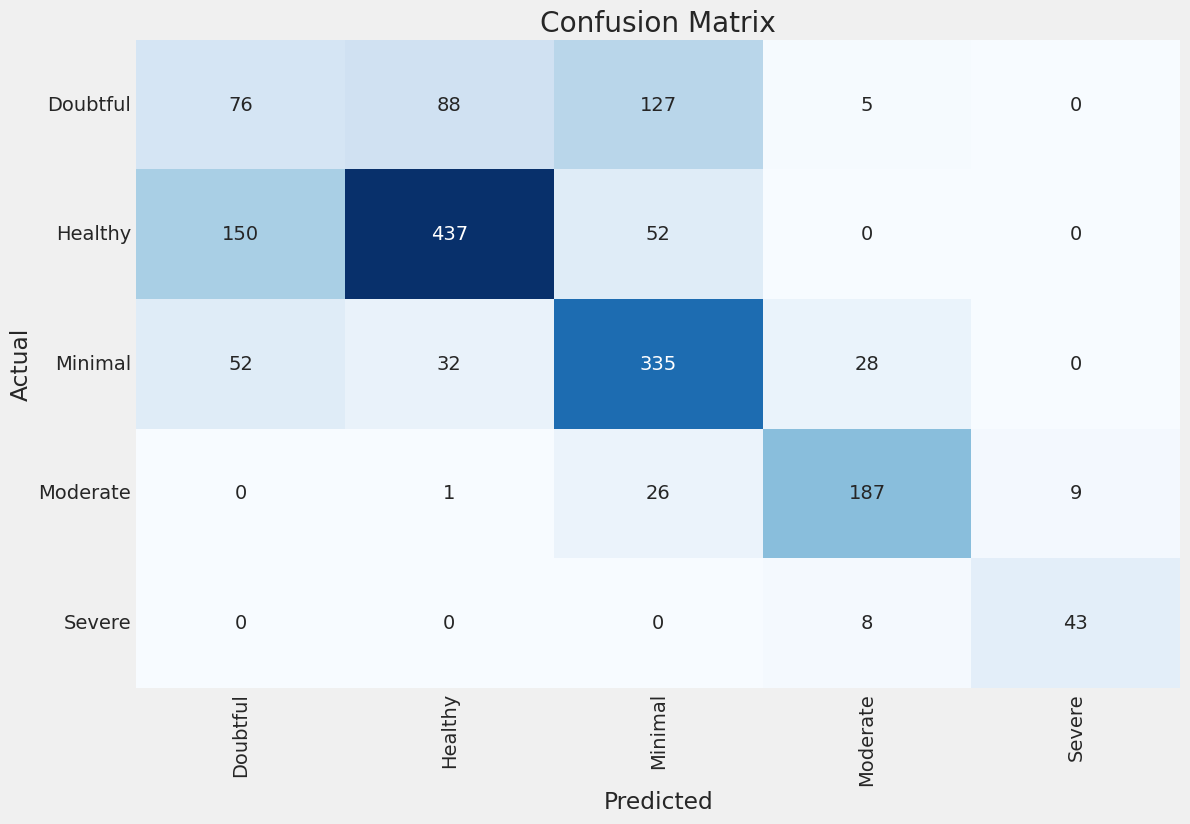

Classification Report:
----------------------
               precision    recall  f1-score   support

    Doubtful     0.2734    0.2568    0.2648       296
     Healthy     0.7832    0.6839    0.7302       639
     Minimal     0.6204    0.7494    0.6788       447
    Moderate     0.8202    0.8386    0.8293       223
      Severe     0.8269    0.8431    0.8350        51

    accuracy                         0.6510      1656
   macro avg     0.6648    0.6744    0.6676      1656
weighted avg     0.6544    0.6510    0.6497      1656



In [ ]:
def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=test_gen.labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            errors=errors + 1
            file=test_gen.filenames[i]
        y_pred.append(pred_index)

    acc=( 1-errors/tests) * 100
    print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4)
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests
errors, tests=predictor(test_gen, test_steps)

150/150 [==============================] - 43s 290ms/step
there were 2404 errors in 3000 tests for an accuracy of  19.87


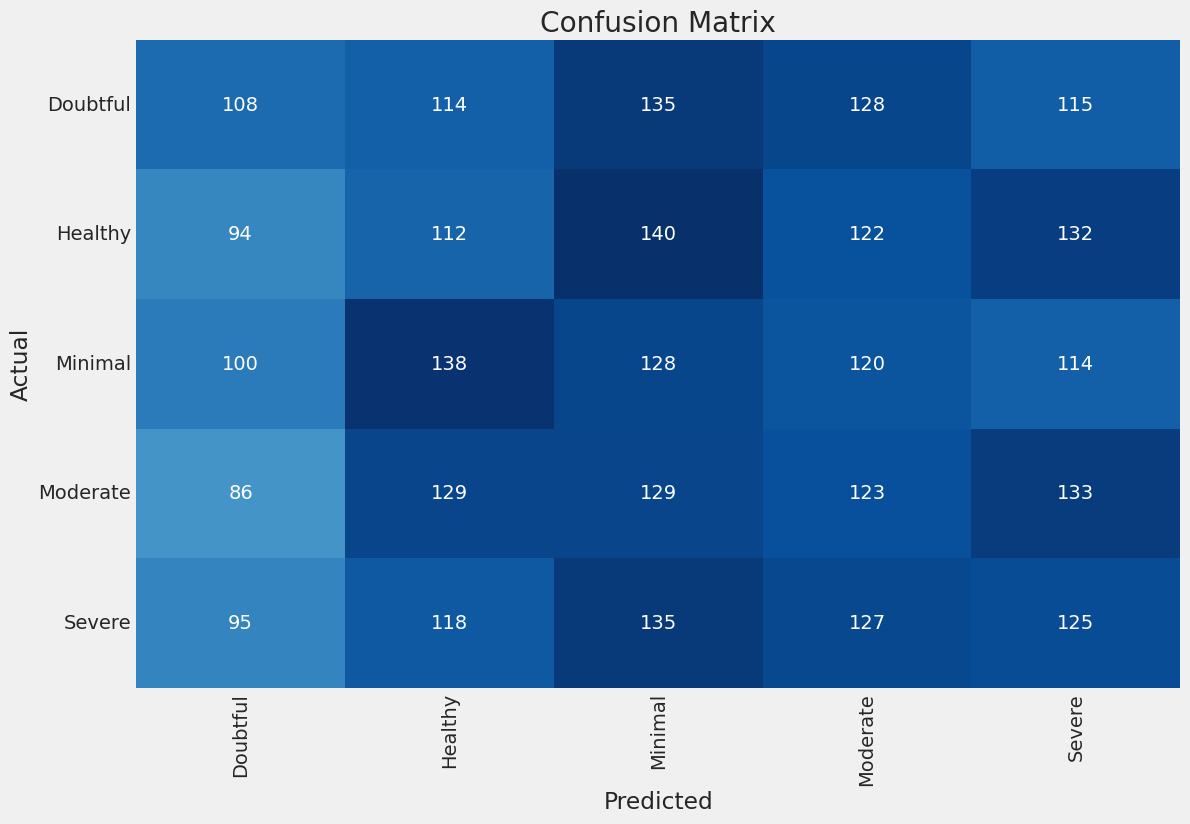

Classification Report:
----------------------
               precision    recall  f1-score   support

    Doubtful     0.2236    0.1800    0.1994       600
     Healthy     0.1833    0.1867    0.1850       600
     Minimal     0.1919    0.2133    0.2021       600
    Moderate     0.1984    0.2050    0.2016       600
      Severe     0.2019    0.2083    0.2051       600

    accuracy                         0.1987      3000
   macro avg     0.1998    0.1987    0.1986      3000
weighted avg     0.1998    0.1987    0.1986      3000



In [ ]:
errors, tests=predictor(train_gen, 100)

42/42 [==============================] - 5s 129ms/step
there were 336 errors in 826 tests for an accuracy of  59.32


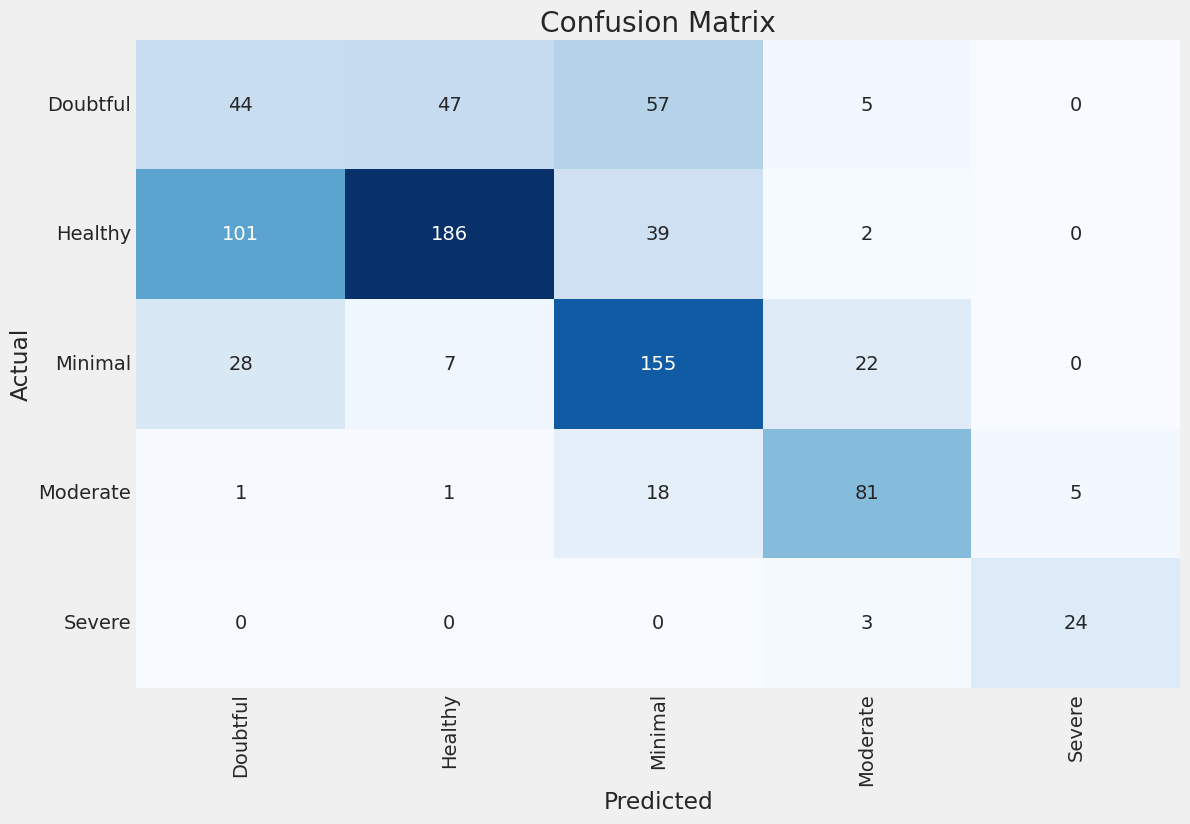

Classification Report:
----------------------
               precision    recall  f1-score   support

    Doubtful     0.2529    0.2876    0.2691       153
     Healthy     0.7718    0.5671    0.6538       328
     Minimal     0.5762    0.7311    0.6445       212
    Moderate     0.7168    0.7642    0.7397       106
      Severe     0.8276    0.8889    0.8571        27

    accuracy                         0.5932       826
   macro avg     0.6291    0.6478    0.6329       826
weighted avg     0.6202    0.5932    0.5978       826



In [ ]:
errors, tests=predictor(valid_gen, test_steps)